<a href="https://colab.research.google.com/github/Tejaswinin058/netflix-data-analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Uploaded the file from my device into Google Colab
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [6]:
import pandas as pd
# Loaded the Netflix dataset CSV into a pandas DataFrame
df = pd.read_csv('netflix_titles.csv')
# Displayed the first 5 rows to understand the structure of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Checked how many missing values are present in each column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [10]:
#Data Cleaning
#Removed rows where the 'title' column was missing
df.dropna(subset=['title'], inplace=True)

# Replaced missing values in 'director' and 'cast' columns with 'Unknown' using a safer method
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [14]:
# Converted the 'date_added' column to datetime format (handles mixed formats)
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
# Extracted the year from 'date_added' and stored it in a new column called 'year_added'
df['year_added'] = df['date_added'].dt.year

In [15]:
# Displayed the updated DataFrame to verify the applied changes
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


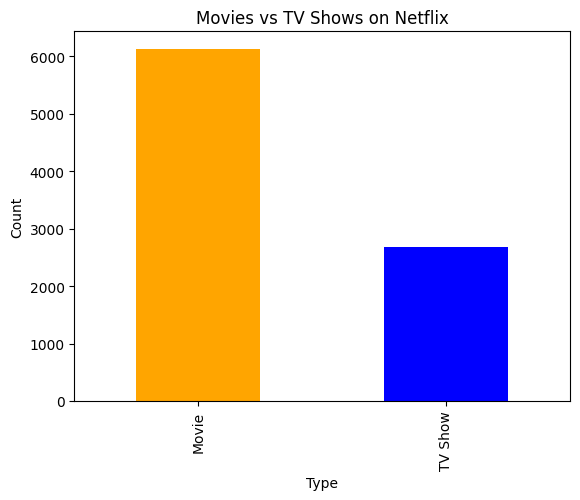

In [24]:
import matplotlib.pyplot as plt
from collections import Counter

# Counted the number of Movies and TV Shows
df['type'].value_counts().plot(kind='bar', color=['Orange', 'Blue'])

# Added chart title and axis labels
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

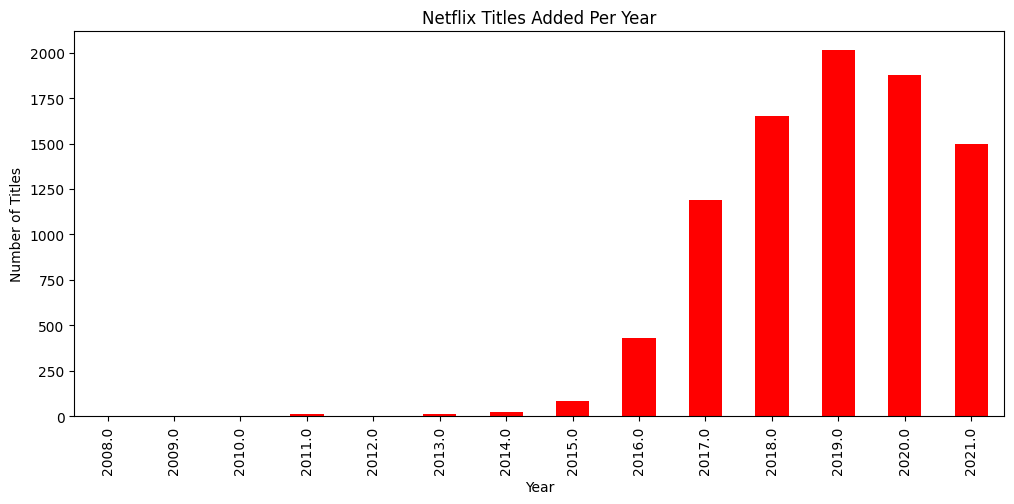

In [22]:
# Counted how many titles were added each year and sorted by year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5), color='red')

# Added chart title and axis labels
plt.title("Netflix Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

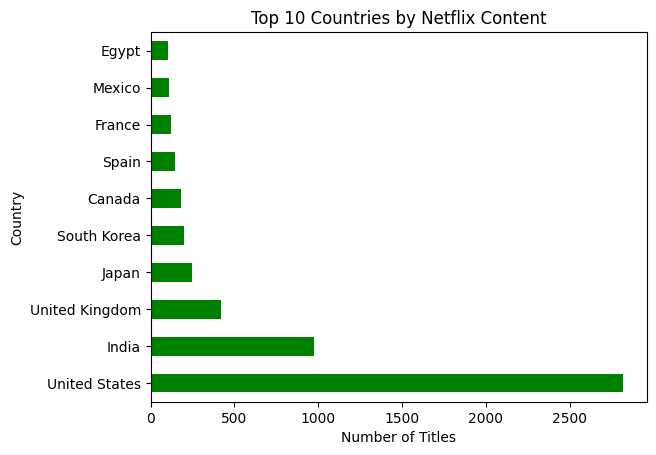

In [23]:
# Extracted the top 10 countries with the most Netflix content
df['country'].value_counts().head(10).plot(kind='barh', color='green')

# Added chart title and axis labels
plt.title("Top 10 Countries by Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

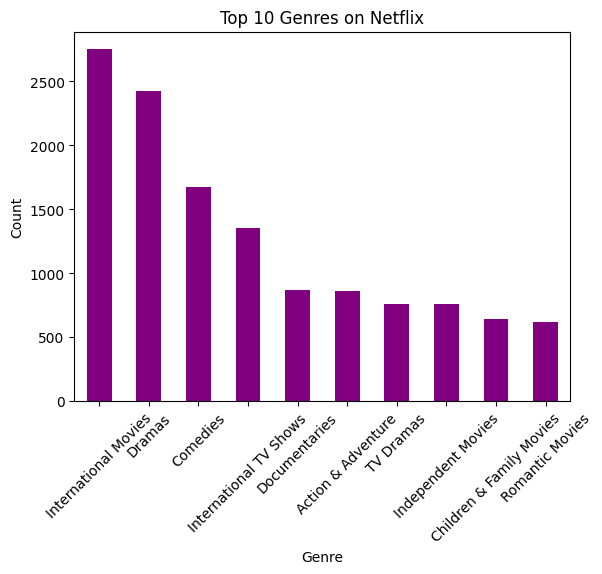

In [25]:
# Split genre strings into individual genres and counted them
genre_split = df['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = [genre for sublist in genre_split for genre in sublist]
genre_counts = Counter(all_genres)

# Created a DataFrame with top 10 genres
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False).head(10)

# Plotted top 10 genres
genre_df.plot(kind='bar', x='Genre', y='Count', legend=False, color='purple')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [27]:
# Saved the cleaned dataset as a new CSV file
df.to_csv("cleaned_netflix_data.csv", index=False)
